<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Capital%20Asset%20Pricing%20Model%2C%20Sharpe%20and%20Treynor%20Ratios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2
Due date: Oct. 3

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.


1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

In [ ]:
#Install and import packages
!pip install yfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Creating dataframe for Under Armour, Nike and Dow Jones Index for 2021
stocks = ['UA', 'NKE', '^DJI']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 31)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')
stock_price.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                            Close                       \
                   NKE     UA          ^DJI         NKE     UA          ^DJI   
Date                                                                           
2021-01-04  137.998550  15.06  30223.890625  140.100006  15.06  30223.890625   
2021-01-05  139.111588  15.45  30391.599609  141.229996  15.45  30391.599609   
2021-01-06  140.214783  15.51  30829.400391  142.350006  15.51  30829.400391   
2021-01-07  142.775772  15.59  31041.130859  144.949997  15.59  31041.130859   
2021-01-08  144.154816  15.25  31097.970703  146.350006  15.25  31097.970703   

                  High                              Low                        \
                   NKE     UA          ^DJI         NKE      UA          ^DJI   
Date                                                                            
2021-01-04  142.970001  15.23  30674.279297  138.320007  14.805  29881.820312   
2021-01-05  141.660004  15.58  30504.890625  138.600006  14.970  30141.779297   
2021-01-06  143.570007  15.87  31022.650391  139.529999  15.380  30313.070312   
2021-01-07  145.639999  15.84  31193.400391  143.000000  15.420  30897.859375   
2021-01-08  146.820007  15.75  31140.669922  144.899994  15.250  30793.269531   

                  Open                        Volume                      
                   NKE     UA          ^DJI      NKE       UA       ^DJI  
Date                                                                      
2021-01-04  142.850006  15.22  30627.470703  6178500  4414569  475080000  
2021-01-05  138.600006  15.00  30204.250000  4163100  2106601  350910000  
2021-01-06  141.250000  15.44  30362.779297  6072900  3744988  500430000  
2021-01-07  143.199997  15.70  30901.179688  5256900  2340354  427810000  
2021-01-08  145.550003  15.65  31069.580078  3950500  3293503  381150000

In [ ]:
#Eliminating all columns except for closing price, eliminating ^ from DJI, describing data
stock_price = stock_price['Close']
stock_price = stock_price.rename({'^DJI' :'DJI'},  axis='columns')
stock_price.describe()

,NKE,UA,DJI
count,251.000000,251.000000,251.000000
mean,150.528686,18.765578,34046.194029
std,15.067538,1.551362,1614.061598
min,127.110001,14.770000,29982.619141
25%,135.549995,17.915000,33360.158203
50%,148.039993,18.670000,34464.640625
75%,165.419998,19.580000,35176.410156
max,177.509995,22.629999,36488.628906


In [ ]:
#Installing Fred and using the Three Month Treasury Constant Maturity rate for risk free rate
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='e28ac9a946772da65a873d594c02d478')#  my API key
fred.search('DGS3MO')
risk_free = fred.get_series('DGS3MO')
risk_free

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1981-09-01    17.01
1981-09-02    16.65
1981-09-03    16.96
1981-09-04    16.64
1981-09-07      NaN
              ...  
2022-09-23     3.24
2022-09-26     3.39
2022-09-27     3.35
2022-09-28     3.40
2022-09-29     3.36
Length: 10718, dtype: float64

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

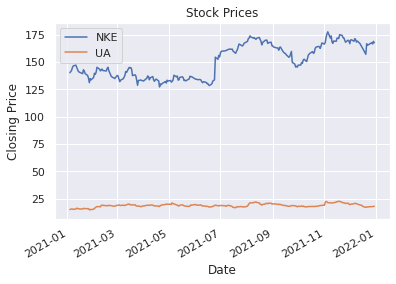

In [ ]:
#Plotting UA and Nike stocks for 2021
stock_price.loc[:,['NKE', 'UA']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

The Under Armour stock has stayed constant throughout 2021, while Nike had a large spike in their stock price a little before July 2021.

In [ ]:
#Correlation Matrix for Nike, Under Armour and Dow Jones Index
stock_price.corr()

,NKE,UA,DJI
NKE,1.000000,0.449508,0.665416
UA,0.449508,1.000000,0.603310
DJI,0.665416,0.603310,1.000000


There is a positive correlation between the Dow Jones Index with both Under Armour and Nike.  Under Armour and Nike also have positive correlation, but not as strong when you compare them to the Dow Jones Index.

In [ ]:
#Returns for Nike, Under Armour and Dow Jones Index
returns = stock_price.pct_change()
returns.dropna(inplace=True)
returns.head()

,NKE,UA,DJI
Date,,,
2021-01-05,0.008066,0.025896,0.005549
2021-01-06,0.007930,0.003884,0.014405
2021-01-07,0.018265,0.005158,0.006868
2021-01-08,0.009659,-0.021809,0.001831
2021-01-11,0.004783,0.017705,-0.002871


3. Run Capital Asset Pricing Model and interpret the results. (25 pts)


In [ ]:
#Dividing by 90 to make risk-free rate into daily rate for 2021
risk_free = risk_free['2021-01-01':'2021-12-31']
risk_free = risk_free/90
risk_free.head() 

2021-01-01      NaN
2021-01-04    0.001
2021-01-05    0.001
2021-01-06    0.001
2021-01-07    0.001
dtype: float64

In [ ]:
#Calculating the excess returns
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - risk_free
returns.dropna(inplace=True)
returns.head()

,NKE,UA,DJI,excess_return_NKE,excess_return_UA,excess_return_DJI
Date,,,,,,
2021-01-05,0.008066,0.025896,0.005549,0.007066,0.024896,0.004549
2021-01-06,0.007930,0.003884,0.014405,0.006930,0.002884,0.013405
2021-01-07,0.018265,0.005158,0.006868,0.017265,0.004158,0.005868
2021-01-08,0.009659,-0.021809,0.001831,0.008770,-0.022698,0.000942
2021-01-11,0.004783,0.017705,-0.002871,0.003894,0.016816,-0.003760


In [ ]:
#CAPM, Nike and Dow Jones
import statsmodels.api as sm
y_nke = returns['excess_return_NKE']
X = returns['excess_return_DJI']
X = sm.add_constant(X, prepend=False)
capm_nke = sm.OLS(y_nke, X)
capm_result_nke = capm_nke.fit()
capm_result_nke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_NKE   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     53.29
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.98e-12
Time:                        01:44:17   Log-Likelihood:                 673.32
No. Observations:                 248   AIC:                            -1343.
Df Residuals:                     246   BIC:                            -1336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_DJI     0.9553      0.131      7.300      0.000       0.698       1.213
const                 0.0001      0.001      0.146      0.884      -0.002       0.002
==============================================================================
Omnibus:                      208.098   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9185.616
Skew:                           2.850   Prob(JB):                         0.00
Kurtosis:                      32.265   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value is 0, there is a statistically significant relationship between the excess returns of the Dow Jones index and Nike.   Since the slope coefficient is less than 1 (.9553), it means that Nike stock is less risky than the overall market return.     

In [ ]:
#CAPM, Under Armour and Dow Jones
import statsmodels.api as sm
y_ua = returns['excess_return_UA']
X = returns['excess_return_DJI']
X = sm.add_constant(X, prepend=False)
capm_ua = sm.OLS(y_ua, X)
capm_result_ua = capm_ua.fit()
capm_result_ua.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       excess_return_UA   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     61.17
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           1.54e-13
Time:                        01:44:20   Log-Likelihood:                 594.78
No. Observations:                 248   AIC:                            -1186.
Df Residuals:                     246   BIC:                            -1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
excess_return_DJI     1.4048      0.180      7.821      0.000       1.051       1.759
const                 0.0001      0.001      0.083      0.934      -0.003       0.003
==============================================================================
Omnibus:                       80.274   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.598
Skew:                           1.213   Prob(JB):                     5.04e-84
Kurtosis:                       8.589   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value is 0, there is a statistically significant relationship between the excess returns of the the Dow Jones index and Under Armour.   Since the slope coefficient is more than 1 (1.4048), it means that Under Armour stock is more risky than the overall market return and there is a positive relationship between the market and Under Armour returns.     

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [ ]:
#Sharpe ratio function, Sharpe ratios for Nike and Under Armour
rf = risk_free.mean()
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:, j].mean() - rf / np.std(returns.iloc[:, j])
    return sharpe_ratios
stocks = returns.columns[:3]
sharpe_ratios = sharpe(stocks, rf, 2)
sharpe_ratios

{'NKE': -0.027252063209662777, 'UA': -0.019219951759677945}

Under Armour would be a better stock to invest in than Nike, but both stocks do not yield a larger return than the risk free rate.   

In [ ]:
#Creating betas dataframe
betas = [capm_result_nke.params[0],
         capm_result_ua.params[0]]
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all = pd.concat([df_betas, df_ret_exp], axis=1)
df_all.columns = ['betas', 'ret_exp']
df_all.index = returns.columns[:2]
df_all

,betas,ret_exp
NKE,0.955262,0.0010
UA,1.404812,0.0001


In [ ]:
#Treynor ratio function
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = returns.iloc[:, i].mean() - rf / df_all['betas'][j]
    return treynor_ratios

In [ ]:
#Treynor ratios for Nike and Under Armour
stocks_2 = ['NKE', 'UA']
treynor_ratios = treynor(stocks_2, rf, 3)
treynor_ratios

{'NKE': 0.0004398651449265753, 'UA': 0.0007228296420406508}

The Treynor and Sharpe ratios produce similar results, Under Armour is a more feasible stock than Nike.

Source - CAPM.ipynb from Week 3